# Application of KPLS for  process monitoring.

### Algorithm described in book 'Machine Learning in Python for Process and Equipment Condition Monitoring, and Predictive Maintenance' [https://leanpub.com/ML-Python-for-PM-PdM]

In [1]:
#%% packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from KerNIPALS import KerNIPALS
from kernel_utils import Kernel, Kernel_test
from sklearn.metrics import mean_squared_error

plt.rcParams.update({'font.size': 14})

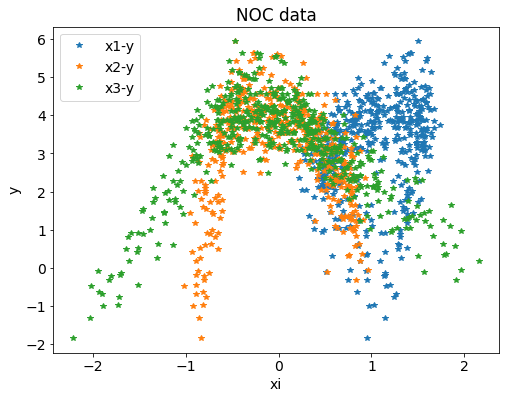

In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##             generate NOC (normal operating condition) data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
np.random.seed(1)

N = 500
t = np.linspace(-1, 1, N)

e1 = np.random.normal(0,0.1,N)
e2 = np.random.normal(0,0.1,N)
e3 = np.random.normal(0,0.1,N)
e4 = np.random.normal(0,0.5,N)

x1 = t**5 -t +1 + e1
x2 = np.sin(t) + e2
x3 = t**7 + t + e3
y = x1**2 + x1*x2 + 3*np.cos(x3) + e4

X = np.vstack((x1,x2,x3)).T
y = y[:, None]

plt.figure(figsize=(8,6))
plt.plot(x1, y, '*', label='x1-y')
plt.plot(x2, y, '*', label='x2-y')
plt.plot(x3, y, '*', label='x3-y')
plt.xlabel('xi'), plt.ylabel('y')
plt.title('NOC data')
plt.legend()
plt.show()

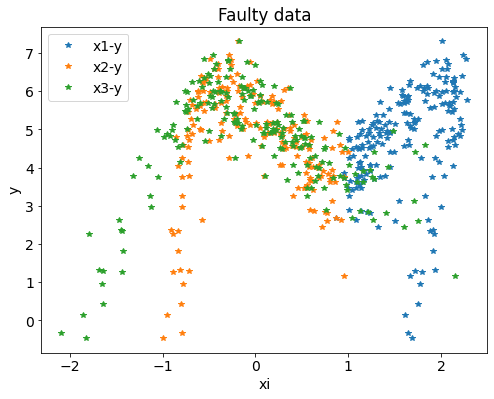

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          generate faulty data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
np.random.seed(5)

Nt = 200
t = np.linspace(-1, 1, Nt)

e1 = np.random.normal(0,0.1,Nt)
e2 = np.random.normal(0,0.1,Nt)
e3 = np.random.normal(0,0.1,Nt)
e4 = np.random.normal(0,0.5,Nt)

x1 = t**5 -t +1 + e1 
x1 = x1 + 0.6
x2 = np.sin(t) + e2
x3 = t**7 + t + e3
y_faulty = x1**2 + x1*x2 + 3*np.cos(x3) + e4

X_faulty = np.vstack((x1,x2,x3)).T
y_faulty = y_faulty[:, None]

plt.figure(figsize=(8,6))
plt.plot(x1, y_faulty, '*', label='x1-y')
plt.plot(x2, y_faulty, '*', label='x2-y')
plt.plot(x3, y_faulty, '*', label='x3-y')
plt.xlabel('xi'), plt.ylabel('y')
plt.title('Faulty data')
plt.legend()
plt.show()

1
finding latent #: 1
2
finding latent #: 1
finding latent #: 2
3
finding latent #: 1
finding latent #: 2
finding latent #: 3
4
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
5
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
6
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
finding latent #: 6
7
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
finding latent #: 6
finding latent #: 7
8
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
finding latent #: 6
finding latent #: 7
finding latent #: 8
9
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
finding latent #: 6
finding latent #: 7
finding latent #: 8
finding latent #: 9
10
finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4

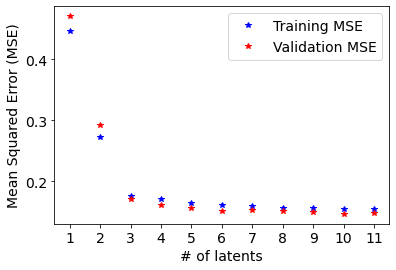

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                 Find # of latents via cross-validation
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
m = X.shape[1]
width = 2*m

# split training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
N_train, N_val = X_train.shape[0], X_val.shape[0]

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)

fit_MSE = []
validate_MSE = []

for n_comp in range(1,12):
    print(n_comp)
    K = Kernel(X_train_scaled, width)
    K_t = Kernel_test(X_train_scaled, X_val_scaled, width)
    
    # centralization
    M = np.eye(N_train) - np.ones((N_train,N_train))/N_train
    Mt = np.ones((N_val, N_train))/N_train
    K_t_bar = np.dot((K_t - np.dot(Mt, K)), M)
    K_bar = np.dot(np.dot(M, K), M)
    
    # fit and predict
    [Bf, T, U] = KerNIPALS(K_bar, y_train_scaled, n_comp)
    Y_train_scaled_pred = np.dot(K_bar, Bf)
    Y_val_scaled_pred = np.dot(K_t_bar, Bf)
    
    # errors
    train_mse = mean_squared_error(y_train_scaled, Y_train_scaled_pred)
    val_mse = mean_squared_error(y_val_scaled, Y_val_scaled_pred)
    
    fit_MSE.append(train_mse)
    validate_MSE.append(val_mse)

# plot
plt.figure()
plt.plot(range(1,12), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,12), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,12))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         scale data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_faulty_scaled = X_scaler.transform(X_faulty)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)
y_faulty_scaled = y_scaler.transform(y_faulty)

finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5


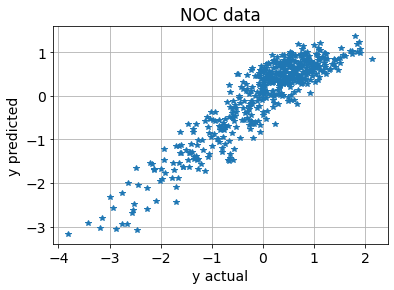

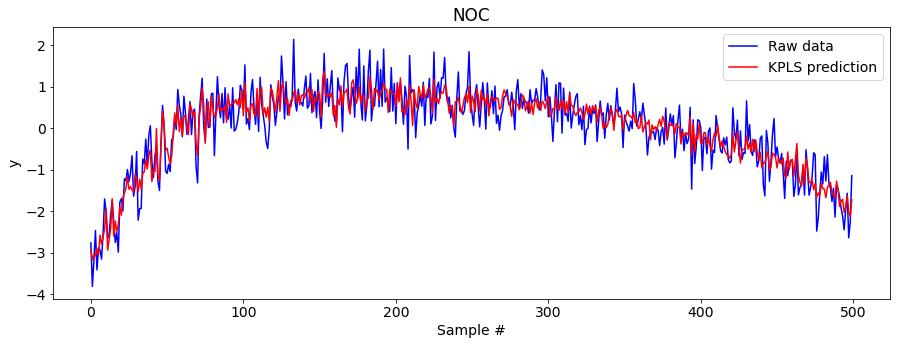

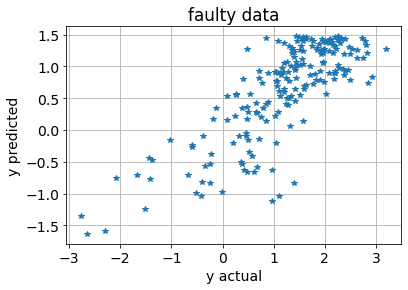

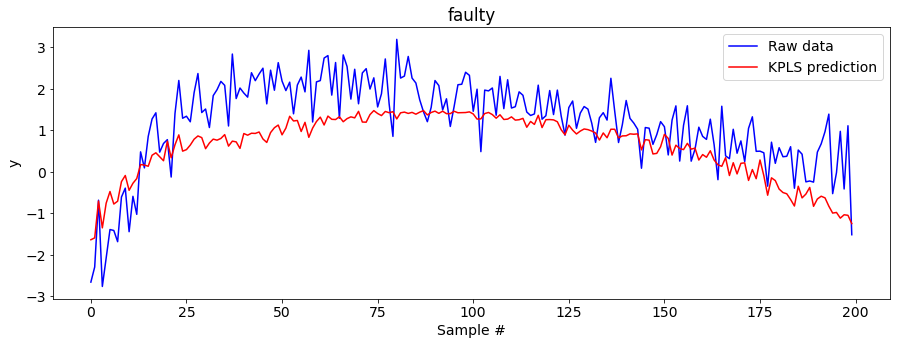

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          KPLS fitting
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
n_latents = 5

# kernel matrices
K = Kernel(X_scaled, width)
K_t = Kernel_test(X_scaled, X_faulty_scaled, width)

# centralization of kernel matrices
M = np.eye(N) - np.ones((N,N))/N
Mt = np.ones((Nt, N))/N
K_t_bar = np.dot((K_t - np.dot(Mt, K)), M)
K_bar = np.dot(np.dot(M, K), M) 

# fit and predict
[Bf, T, U] = KerNIPALS(K_bar, y_scaled, n_latents)
Y_scaled_pred = np.dot(K_bar, Bf)
Y_faulty_scaled_pred = np.dot(K_t_bar, Bf)

plt.figure()
plt.plot(y_scaled, Y_scaled_pred, '*')
plt.ylabel('y predicted'), plt.xlabel('y actual'), plt.title('NOC data')
plt.grid()

plt.figure(figsize=(15,5))
plt.plot(y_scaled, 'b',  label = 'Raw data')
plt.plot(Y_scaled_pred, 'r', label = 'KPLS prediction')
plt.ylabel('y'), plt.xlabel('Sample #')
plt.title('NOC')
plt.legend()

plt.figure()
plt.plot(y_faulty_scaled, Y_faulty_scaled_pred, '*')
plt.ylabel('y predicted'), plt.xlabel('y actual'), plt.title('faulty data')
plt.grid()

plt.figure(figsize=(15,5))
plt.plot(y_faulty_scaled, 'b',  label = 'Raw data')
plt.plot(Y_faulty_scaled_pred, 'r', label = 'KPLS prediction')
plt.ylabel('y'), plt.xlabel('Sample #')
plt.title('faulty')
plt.legend()

plt.show()

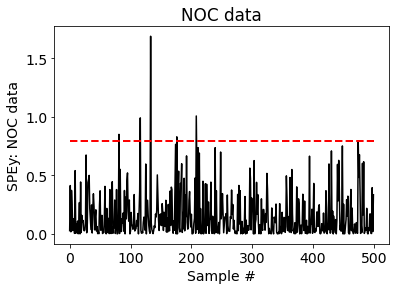

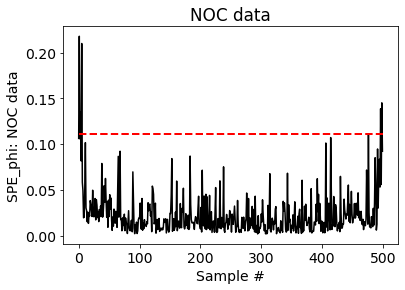

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                   Monitoring charts for NOC data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# SPEy
error = y_scaled - Y_scaled_pred

SPEy = np.sum(error*error, axis = 1)
SPEy_CL = np.percentile(SPEy, 99)

plt.figure(), plt.plot(SPEy, color='black')
plt.plot([1,len(SPEy)],[SPEy_CL,SPEy_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('SPEy: NOC data'), plt.title('NOC data')

# SPE_phi
V = np.dot(U, np.linalg.inv(np.dot(T.T, np.dot(K_bar, U))))

SPE_phi = np.zeros((X.shape[0],))
for i in range(X.shape[0]):
    t_t = T[i,:]
    k_bar_t = K_bar[i,:]
    k_bar_tt = K_bar[i,i]
    SPE_phi[i] = k_bar_tt - 2*np.dot(k_bar_t.T, np.dot(K_bar, np.dot(V, t_t))) + np.dot(t_t.T, np.dot(T.T, np.dot(K_bar, np.dot(T, t_t))))

SPE_phi_CL = np.percentile(SPE_phi, 99)

plt.figure(), plt.plot(SPE_phi, color='black')
plt.plot([1,len(SPE_phi)],[SPE_phi_CL,SPE_phi_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('SPE_phi: NOC data'), plt.title('NOC data')

plt.show()

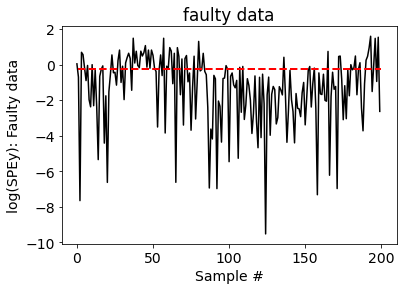

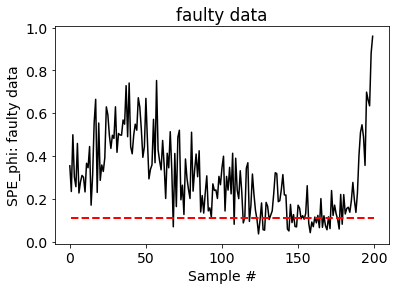

In [8]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# ##                   Monitoring charts for faulty data
# ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
error = y_faulty_scaled - Y_faulty_scaled_pred
SPEy_faulty = np.sum(error*error, axis = 1)

plt.figure(), plt.plot(np.log(SPEy_faulty), color='black')
plt.plot([1,len(SPEy_faulty)],[np.log(SPEy_CL),np.log(SPEy_CL)], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('log(SPEy): Faulty data'), plt.title('faulty data')

# scores
temp = np.linalg.inv(np.dot(T.T, np.dot(K_bar, U)))
T_faulty = np.dot(K_t_bar, np.dot(U, temp))

# SPE_phi
N = X.shape[0]
term3 = np.sum(K)/N**2

SPE_phi_faulty = np.zeros((X_faulty.shape[0],))
for i in range(X_faulty.shape[0]):
    t_t = T_faulty[i,:]
    k_bar_t = K_t_bar[i,:]
    k_bar_tt = 1 -(2/N)*np.sum(K_t[i,:]) + term3
    SPE_phi_faulty[i] = k_bar_tt - 2*np.dot(k_bar_t.T, np.dot(K_bar, np.dot(V, t_t))) + np.dot(t_t.T, np.dot(T.T, np.dot(K_bar, np.dot(T, t_t))))

plt.figure(), plt.plot(SPE_phi_faulty, color='black')
plt.plot([1,len(SPE_phi_faulty)],[SPE_phi_CL,SPE_phi_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('SPE_phi: faulty data'), plt.title('faulty data') 

plt.show()